In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier

In [4]:
data_created = pd.read_csv("./../result/data_created.csv")

In [5]:
data_created.head()g

,PID,ActivityNumber,group,mvm,sdvm,df,p625,fpdf,mangle,sdangle
0,3,1,0,10.212443,0.177938,6.2,0.026051,0.019942,-12.444212,0.851601
1,3,1,0,10.218438,0.378222,1.8,0.026051,0.020963,-12.031269,2.009492
2,3,1,0,10.212566,0.174238,4.3,0.026051,0.025539,-12.696323,0.595054
3,3,2,0,10.143824,0.188727,3.0,0.026051,0.018592,-4.512657,2.094529
4,3,2,0,10.146730,0.098754,1.8,0.026051,0.021329,-3.473577,0.363055


In [9]:
X = data_created.loc[:, ["mvm", "sdvm", "df", "p625", "fpdf", "mangle", "sdangle"]]
Y = data_created.loc[:, "group"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 123, shuffle=True)

In [ ]:
# RF + GridSearch
params = {
    'n_estimators' : [100, 200, 300, 400],
    'max_depth' : [10, 20, 30, 40, 50],
    'min_samples_split' : [1, 2, 3, 4],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}
rf = RandomForestClassifier()
RF_gs = GridSearchCV(estimator=rf, param_grid=params, scoring='roc_auc', cv = 5,verbose=10)
RF_gs.fit(X_train, y_train)
estimator = RF_gs.best_estimator_

In [34]:
clfs = []
lr = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

clfs.append(lr)
clfs.append(svm)
clfs.append(rf)
clfs.append(dt)

In [35]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()),  # normalize data
    ('clf', SVC())  # fit Logistic regression model
])

-----------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy 1.000000
F1-score 1.000000


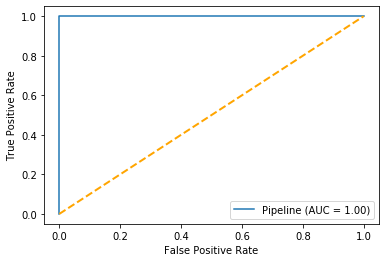

-----------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy 1.000000
F1-score 1.000000


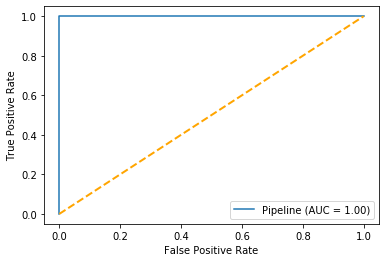

-----------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy 0.984375
F1-score 0.981132


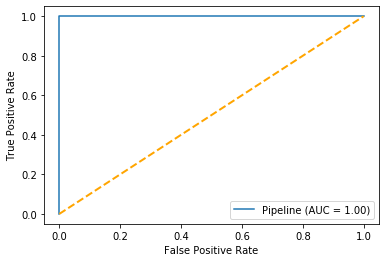

-----------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy 0.968750
F1-score 0.961538


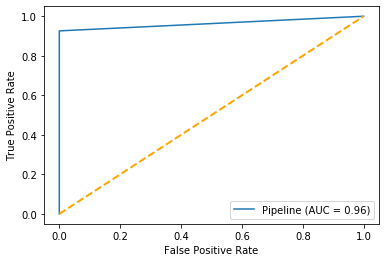

In [56]:
for clf in clfs:
    pipeline.set_params(clf =  clf)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    #y_score = pipeline.decision_function(X_test)
    print("-----------------------------------------")
    print(str(clf))
    print("Accuracy %f"%acc)
    print("F1-score %f"%f1)
    clf_disp = plot_roc_curve(pipeline, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
    plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_r, Y, test_size = 0.4, random_state = 123, shuffle=True)

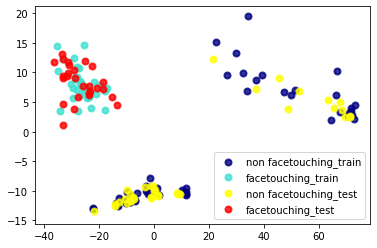

In [66]:
colors = ['navy', 'turquoise']
colors_test = ['yellow', 'red']
lw = 2
target_names = ['non facetouching_train', 'facetouching_train']
target_names_test = ['non facetouching_test', 'facetouching_test']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], 
                color=color, alpha=.8, lw=lw,
                label=target_name)
for color, i, target_name in zip(colors_test, [0, 1], target_names_test):
    plt.scatter(X_test[y_test==i, 0], X_test[y_test==i, 1], 
                color=color, alpha=.8, lw=lw,
                label=target_name)

    
plt.legend(loc='best', shadow=False)

-----------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy 1.000000
F1-score 1.000000


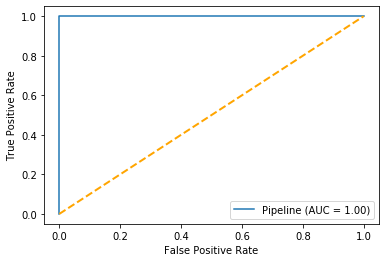

-----------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy 1.000000
F1-score 1.000000


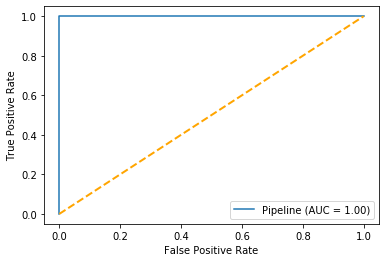

-----------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy 0.984375
F1-score 0.981132


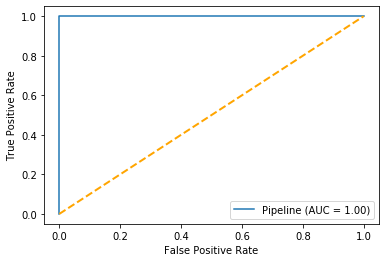

-----------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy 0.968750
F1-score 0.961538


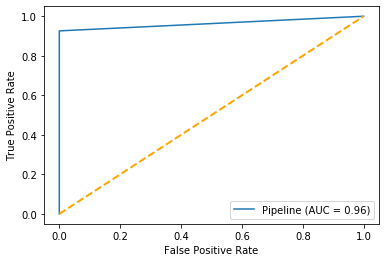

In [58]:
for clf in clfs:
    pipeline.set_params(clf =  clf)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    #y_score = pipeline.decision_function(X_test)
    print("-----------------------------------------")
    print(str(clf))
    print("Accuracy %f"%acc)
    print("F1-score %f"%f1)
    clf_disp = plot_roc_curve(pipeline, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
    plt.show()